In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings                                 
warnings.filterwarnings('ignore')

In [2]:
# load in the data
big_mart = pd.read_csv('C:\\Users\\Donatus\\Documents\\BigMartSalePredict\\data.csv')
big_mart.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [3]:
big_mart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
# Checking if there're nulls
big_mart.isnull().sum() / big_mart.shape[0]*100
#df.dropna(inplace = True)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [5]:
big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
cat_col = big_mart.select_dtypes(include = ['object'])
cat_col.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [8]:
# convert LF to Low Fat, reg to Regular and low fat to Low Fat
big_mart.Item_Fat_Content[big_mart.Item_Fat_Content == 'LF'] = 'Low Fat'
big_mart.Item_Fat_Content[big_mart.Item_Fat_Content == 'reg'] = 'Regular'
big_mart.Item_Fat_Content[big_mart.Item_Fat_Content == 'low fat'] = 'Low Fat'

In [9]:
# fill Outlet_Size NaN's with 'Small'
big_mart['Outlet_Size'].fillna('Small', inplace=True)

In [10]:
#Added #Imputing the nulls in two columns
big_mart.Item_Weight.fillna(big_mart.Item_Weight.mean(),inplace=True)
# impute outlet size in training data by mode
big_mart.Outlet_Size.fillna(big_mart.Outlet_Size.mode()[0],inplace=True)

<AxesSubplot:>

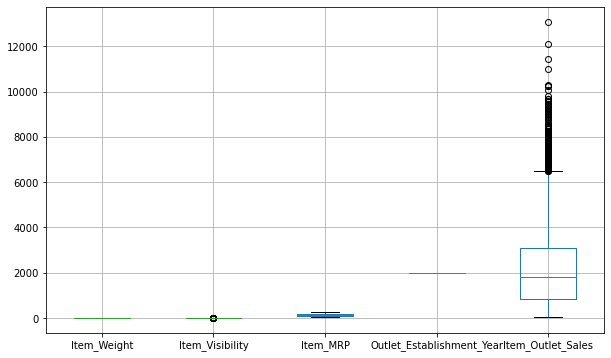

In [11]:
# Outlier detection
plt.figure(figsize=(10,6))
big_mart.boxplot()

In [12]:
# Dealing with outliears
big_mart['Item_Outlet_Sales']=big_mart['Item_Outlet_Sales']<10000

In [13]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in cat_col:
    big_mart[feat] = le.fit_transform(big_mart[feat].astype(str))

print (big_mart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   bool   
dtypes: bool(1), float64(3), int32(7), int64(1)
memory usage: 507.8 KB
None


In [14]:
# Finding the corelation among the variables with the indepented variable 
big_mart.corr()['Item_Outlet_Sales']

Item_Identifier             -0.008865
Item_Weight                 -0.001806
Item_Fat_Content            -0.001431
Item_Visibility              0.021250
Item_Type                    0.003471
Item_MRP                    -0.051683
Outlet_Identifier            0.002402
Outlet_Establishment_Year    0.046069
Outlet_Size                  0.025964
Outlet_Location_Type        -0.033458
Outlet_Type                 -0.059608
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [15]:
# features for Linear Model
features = big_mart.drop(columns=['Item_Outlet_Sales'])
response = big_mart['Item_Outlet_Sales']

In [16]:
features['Item_Weight'].fillna(features['Item_Weight'].median(),inplace=True)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

lreg_model = LinearRegression()
rf=RandomForestRegressor()
de=DecisionTreeRegressor()
sv=SVR()
#Cat=CatBoostRegressor()
# train test split
x_train, x_test, y_train, y_test = train_test_split(features,response, test_size =0.3,random_state=0)

In [18]:
x_train.shape

(5966, 11)

In [19]:
y_train.shape

(5966,)

In [20]:
# MODELLING

# 1. OLS

lreg = LinearRegression()
lreg.fit(x_train, y_train)
lreg_yhat = lreg.predict(x_test)

# 2. Ridge

rf=RandomForestRegressor()
rf.fit(x_train, y_train)
rf_yhat = rf.predict(x_test)

# 3. Lasso

de=DecisionTreeRegressor()
de.fit(x_train, y_train)
de_yhat = de.predict(x_test)

# 4. Bayesian

sv=SVR()
sv.fit(x_train, y_train)
sv_yhat = sv.predict(x_test)

In [ ]:
# EVALUATION
# 1. Explained Variance Score
#Linear Regression
mse1 = np.mean((lreg_yhat - y_test)**2)
rmse1 = np.sqrt(mse1)

#Random forest scores
mse2 = np.mean((rf_yhat - y_test)**2)
rmse2 = np.sqrt(mse2)

#Decision Tree
mse3 = np.mean((de_yhat - y_test)**2)
rmse3 = np.sqrt(mse3)
#SVR
mse4 = np.mean((sv_yhat - y_test)**2)
rmse4 = np.sqrt(mse4)

print('The MSE  for LR is {0}'.format(mse1))
print('The RMSE for LR is {0}'.format(rmse1))

print('The MSE  for RF is {0}'.format(mse2))
print('The RMSE for RF is {0}'.format(rmse2))

print('The MSE  for DE is {0}'.format(mse3))
print('The RMSE for DE is {0}'.format(rmse3))

print('The MSE  for SVR is {0}'.format(mse4))
print('The RMSE for SVR is {0}'.format(rmse4))

In [21]:
# Save the model
import pickle 
filename = 'BMSprice.pkl'
pickle.dump(rf, open(filename, 'wb'))